In [1]:
!pip install -r requirements.txt

In [2]:
#type:ignore
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Deep learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# Load dataset
df = pd.read_csv('/content/daraz_data2.csv')
# Download NLTK data
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
# Display the first few rows of the dataset
df.head()



,Unnamed: 0,reviews,Sentiments
0,0,original as shown in advertisement.\ngood qual...,1
1,1,"Same as shown in picture. Received same color,...",1
2,2,"comfortable, and very soft item, love it and m...",1
3,3,it was packed well... same as shown ..i ordere...,1
4,4,for healthy Bady sitting space is less to sit....,1


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21415 entries, 0 to 21414
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21415 non-null  int64 
 1   reviews     21415 non-null  object
 2   Sentiments  21415 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 502.0+ KB


In [6]:
# Display basic statistics about the dataset
df.describe()


,Unnamed: 0,Sentiments
count,21415.000000,21415.000000
mean,10707.000000,0.719449
std,6182.122343,0.534005
min,0.000000,-1.000000
25%,5353.500000,1.000000
50%,10707.000000,1.000000
75%,16060.500000,1.000000
max,21414.000000,1.000000


In [7]:
# Display the lat few rows of the dataset
df.tail()


,Unnamed: 0,reviews,Sentiments
21410,21410,such a useful thing,1
21411,21411,It is really nice,1
21412,21412,Not really useful,-1
21413,21413,waste of money ..,-1
21414,21414,Loved it!!,1


In [8]:
# Display the types of columns of the dataset
df.dtypes


,0
Unnamed: 0,int64
reviews,object
Sentiments,int64


In [9]:
# Count unique values in each column
df.nunique()


,0
Unnamed: 0,21415
reviews,16467
Sentiments,3


In [10]:
# Check for missing values
df.isnull().sum()


,0
Unnamed: 0,0
reviews,0
Sentiments,0


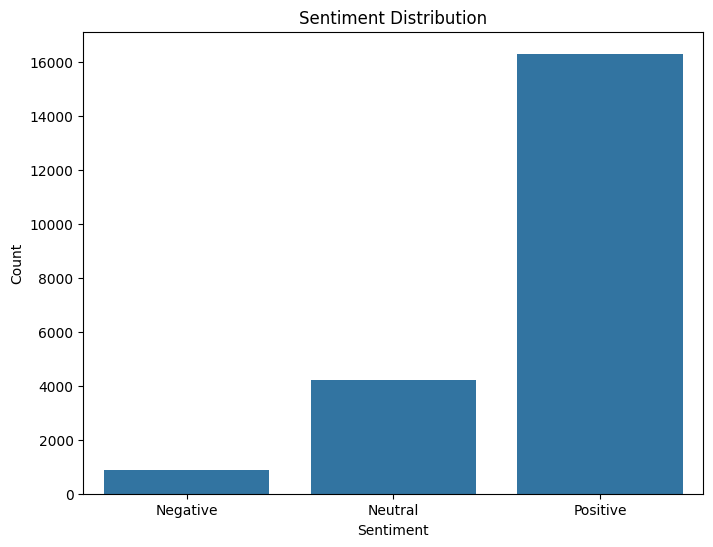

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Sentiments' is the column with sentiment values
# Rename the Sentiments for better labeling
df['Sentiments'] = df['Sentiments'].replace({1: 'Positive', 0: 'Neutral', -1: 'Negative'})

# Visualize the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiments', data=df, order=['Negative', 'Neutral', 'Positive'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

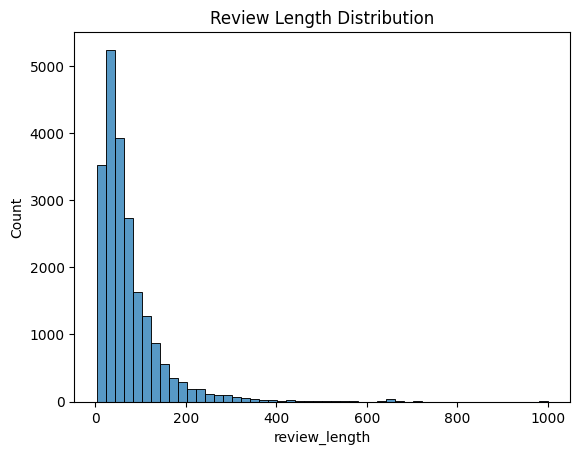

In [14]:
# Analyze the length of reviews
df['review_length'] = df['reviews'].apply(len)
sns.histplot(df['review_length'], bins=50)
plt.title('Review Length Distribution')
plt.show()

In [15]:
# Display the distribution of review lengths
print(df['review_length'].describe())

count    21415.000000
mean        72.409293
std         69.350553
min          4.000000
25%         30.000000
50%         52.000000
75%         90.000000
max       1000.000000
Name: review_length, dtype: float64


In [16]:
import nltk

# Download the WordNet data
nltk.download('wordnet')

# Additionally, download 'omw-1.4' which is needed for lemmatization
nltk.download('omw-1.4')

# If you're tokenizing, you might also need to download 'punkt'
nltk.download('punkt')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:

# remove unnamed column
df = df.drop(columns=['Unnamed: 0'])
df.columns

In [20]:
df.columns

Index(['reviews', 'Sentiments', 'review_length'], dtype='object')

In [23]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import pandas as pd
import re
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Define the preprocessing function
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)
    text = text.encode('ascii', 'ignore').decode('ascii')
    text = text.lower()
    text = re.sub(r'\b\w\b', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    words = [word for word in words if word.isalnum()]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Assume 'df' is your DataFrame containing 'Review' and 'Sentiment' columns
df['cleaned_review'] = df['reviews'].apply(preprocess_text)

# Display the updated DataFrame
print(df[['Sentiments', 'reviews', 'cleaned_review']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


  Sentiments                                            reviews  \
0   Positive  original as shown in advertisement.\ngood qual...   
1   Positive  Same as shown in picture. Received same color,...   
2   Positive  comfortable, and very soft item, love it and m...   
3   Positive  it was packed well... same as shown ..i ordere...   
4   Positive  for healthy Bady sitting space is less to sit....   

                                      cleaned_review  
0  original shown advertisement good quality reli...  
1  shown picture received color order good qualit...  
2  comfortable soft item love baby girl happy hig...  
3  wa packed well shown ordered pink thank god re...  
4  healthy bady sitting space le sit size small h...  


In [24]:
df.columns

Index(['reviews', 'Sentiments', 'review_length', 'cleaned_review'], dtype='object')

#Splitting the dataset into training (80%) and testing (20%) sets

In [25]:
df.head()

,reviews,Sentiments,review_length,cleaned_review
0,original as shown in advertisement.\ngood qual...,Positive,76,original shown advertisement good quality reli...
1,"Same as shown in picture. Received same color,...",Positive,139,shown picture received color order good qualit...
2,"comfortable, and very soft item, love it and m...",Positive,101,comfortable soft item love baby girl happy hig...
3,it was packed well... same as shown ..i ordere...,Positive,136,wa packed well shown ordered pink thank god re...
4,for healthy Bady sitting space is less to sit....,Positive,132,healthy bady sitting space le sit size small h...


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Assuming df is your DataFrame with 'cleaned_review' and 'Sentiment' columns
# Example: df = pd.read_csv('your_dataset.csv')

# Check for NaN values in the DataFrame
print("Checking for NaN values in the DataFrame...")
print(f"NaN values in 'cleaned_review': {df['cleaned_review'].isnull().sum()}")
print(f"NaN values in 'Sentiments': {df['Sentiments'].isnull().sum()}")

# Drop rows with NaN values in 'cleaned_review' or 'Sentiment'
df_cleaned = df.dropna(subset=['cleaned_review', 'Sentiments'])

# Filter out 'Neutral' sentiments
df_cleaned = df_cleaned[df_cleaned['Sentiments'] != 'Neutral']

# Verify that the 'Neutral' entries have been removed
print("\nRemaining unique values in 'Sentiments':", df_cleaned['Sentiments'].unique())

# Define features and target variable
X = df_cleaned['cleaned_review']  # Features
y = df_cleaned['Sentiments'].map({'Positive': 1, 'Negative': 0})  # Convert sentiments to binary

# Step 2: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Vectorize the Text
vectorizer = CountVectorizer(binary=True)
X_train_vectorized = vectorizer.fit_transform(X_train).toarray()  # Convert training data to dense array
X_test_vectorized = vectorizer.transform(X_test).toarray()  # Transform test data

# Display the shapes of the resulting datasets
print(f"Training data shape: {X_train_vectorized.shape}")
print(f"Test data shape: {X_test_vectorized.shape}")

Checking for NaN values in the DataFrame...
NaN values in 'cleaned_review': 0
NaN values in 'Sentiments': 0

Remaining unique values in 'Sentiments': ['Positive' 'Negative']
Training data shape: (13752, 6859)
Test data shape: (3439, 6859)


In [32]:
# check unique values in sentiment
df['Sentiments'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [33]:

# Check for NaN values in the DataFrame
print("Checking for NaN values in the DataFrame...")
print(f"NaN values in 'cleaned_review': {df['cleaned_review'].isnull().sum()}")
print(f"NaN values in 'Sentiment': {df['Sentiments'].isnull().sum()}")

Checking for NaN values in the DataFrame...
NaN values in 'cleaned_review': 0
NaN values in 'Sentiment': 0


#Splitting the dataset into training (80%) and testing (20%) sets

#Feature Extraction


#Training Model


In [34]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# List of models to evaluate
models = {
    'SGD Classifier': SGDClassifier(max_iter=1000, tol=1e-3, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Dictionary to store accuracy scores for each model
model_accuracies = {}

# Train each traditional model and calculate accuracy
for name, model in models.items():
    print(f"Training {name}...")

    # Cross-validation accuracy
    cv_scores = cross_val_score(model, X_train_vectorized, y_train, cv=3, scoring='accuracy')

    # Fit model on the training data
    model.fit(X_train_vectorized, y_train)

    # Predict on the test data
    y_pred_val = model.predict(X_test_vectorized)

    # Accuracy score on the test set
    accuracy = accuracy_score(y_test, y_pred_val)

    # Store the accuracy score
    model_accuracies[name] = accuracy
    print(f"{name} Cross-Validation Accuracy: {cv_scores.mean():.4f}, Test Accuracy: {accuracy:.4f}")

# Step to add the deep learning model
print("\nTraining Deep Learning Model...")

# Define the neural network model
deep_model = keras.Sequential([
    layers.Input(shape=(X_train_vectorized.shape[1],)),  # Number of features
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
deep_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
deep_model.fit(X_train_vectorized, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the deep learning model
loss, accuracy = deep_model.evaluate(X_test_vectorized, y_test, verbose=0)
print(f"Deep Learning Model Accuracy: {accuracy:.4f}")

# Include deep learning model accuracy in the results
model_accuracies['Deep Learning Model'] = accuracy

# Find the best model based on accuracy
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model_accuracy = model_accuracies[best_model_name]

print(f"\nThe best model is: {best_model_name} with an accuracy of {best_model_accuracy:.4f}")

Training SGD Classifier...
SGD Classifier Cross-Validation Accuracy: 0.9788, Test Accuracy: 0.9846
Training Logistic Regression...
Logistic Regression Cross-Validation Accuracy: 0.9767, Test Accuracy: 0.9817
Training Random Forest...
Random Forest Cross-Validation Accuracy: 0.9748, Test Accuracy: 0.9828
Training Gradient Boosting...
Gradient Boosting Cross-Validation Accuracy: 0.9710, Test Accuracy: 0.9776
Training AdaBoost...
AdaBoost Cross-Validation Accuracy: 0.9732, Test Accuracy: 0.9759
Training Support Vector Classifier...
Support Vector Classifier Cross-Validation Accuracy: 0.9674, Test Accuracy: 0.9779
Training Decision Tree...
Decision Tree Cross-Validation Accuracy: 0.9654, Test Accuracy: 0.9703
Training K-Nearest Neighbors...
K-Nearest Neighbors Cross-Validation Accuracy: 0.9618, Test Accuracy: 0.9657

Training Deep Learning Model...
Epoch 1/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9360 - loss: 0.2088
Epoch 2/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - a

Models and their accuracies: {'SGD Classifier': 0.9845885431811573, 'Logistic Regression': 0.9816807211398663, 'Random Forest': 0.9828438499563826, 'Gradient Boosting': 0.9776097702820588, 'AdaBoost': 0.9758650770572841, 'Support Vector Classifier': 0.9779005524861878, 'Decision Tree': 0.9703402151788311, 'K-Nearest Neighbors': 0.9656876999127654, 'Deep Learning Model': 0.9810991287231445}


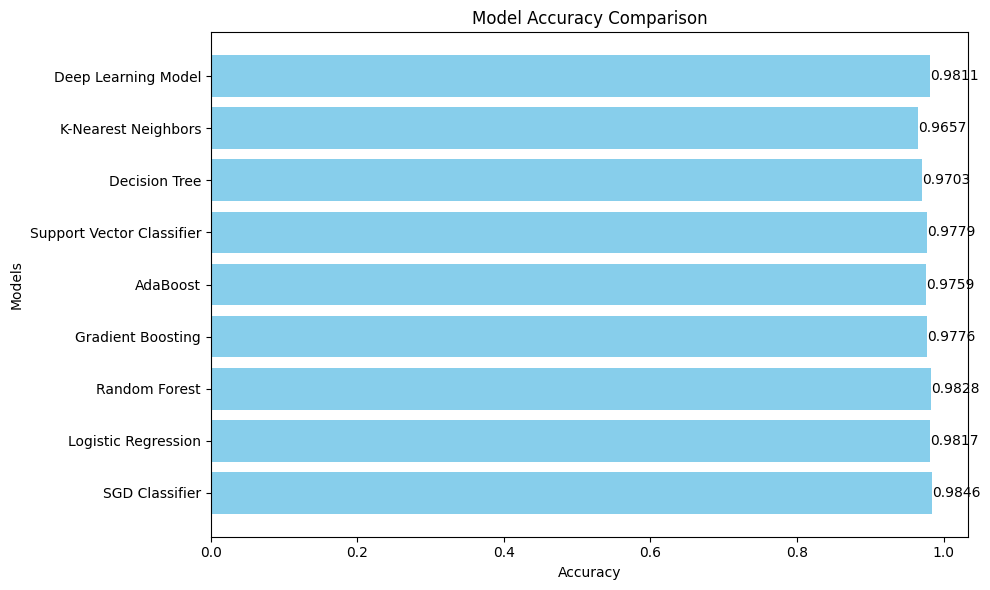

In [35]:
import matplotlib.pyplot as plt

# Check if all models are present in model_accuracies
print("Models and their accuracies:", model_accuracies)

# Create a bar plot to compare model accuracies
plt.figure(figsize=(10, 6))

# Plot the accuracies
plt.barh(list(model_accuracies.keys()), list(model_accuracies.values()), color='skyblue')

# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Model Accuracy Comparison')

# Add accuracy values next to each bar
for index, (name, accuracy) in enumerate(model_accuracies.items()):
    plt.text(accuracy, index, f'{accuracy:.4f}', va='center')

# Display the plot
plt.tight_layout()
plt.show()


#Cross-Validation Classification Report


In [36]:
from sklearn.metrics import classification_report

# Assuming you have already trained your models and stored them in the `models` dictionary
# and you have the predictions for each model in y_pred_val.

# Generate and print classification reports for each model
for name, model in models.items():
    # Predict on the test set using the current model
    y_pred_val = model.predict(X_test_vectorized)

    # Generate the classification report
    report = classification_report(y_test, y_pred_val)

    # Print the classification report
    print(f"Classification Report for {name}:\n{report}")

# For the deep learning model
y_pred_deep = deep_model.predict(X_test_vectorized)
y_pred_deep = (y_pred_deep > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Generate and print the classification report for the deep learning model
report_deep = classification_report(y_test, y_pred_deep)
print(f"Classification Report for Deep Learning Model:\n{report_deep}")

Classification Report for SGD Classifier:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       172
           1       0.99      1.00      0.99      3267

    accuracy                           0.98      3439
   macro avg       0.95      0.88      0.91      3439
weighted avg       0.98      0.98      0.98      3439

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.69      0.79       172
           1       0.98      1.00      0.99      3267

    accuracy                           0.98      3439
   macro avg       0.96      0.84      0.89      3439
weighted avg       0.98      0.98      0.98      3439

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       172
           1       0.99      1.00      0.99      3267

    accuracy                           0.98      343

#Validation Set Classification Report


In [46]:


# Define the preprocessing function
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)
    text = text.encode('ascii', 'ignore').decode('ascii')
    text = text.lower()
    text = re.sub(r'\b\w\b', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    words = [word for word in words if word.isalnum()]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Assume 'df' is your DataFrame containing 'reviews' and 'Sentiments' columns
df['cleaned_review'] = df['reviews'].apply(preprocess_text)

# Display the updated DataFrame
print(df[['Sentiments', 'reviews', 'cleaned_review']].head())

# Prepare data for model training
X = df['cleaned_review']
y = df['Sentiments']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the SGD Classifier
sgd_classifier = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_classifier.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = sgd_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SGD Classifier Test Accuracy: {accuracy:.4f}")

  Sentiments                                            reviews  \
0   Positive  original as shown in advertisement.\ngood qual...   
1   Positive  Same as shown in picture. Received same color,...   
2   Positive  comfortable, and very soft item, love it and m...   
3   Positive  it was packed well... same as shown ..i ordere...   
4   Positive  for healthy Bady sitting space is less to sit....   

                                      cleaned_review  
0  original shown advertisement good quality reli...  
1  shown picture received color order good qualit...  
2  comfortable soft item love baby girl happy hig...  
3  wa packed well shown ordered pink thank god re...  
4  healthy bady sitting space le sit size small h...  
SGD Classifier Test Accuracy: 0.9103


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SGD Classifier Test Accuracy: {accuracy:.4f}")

# Print the confusion matrix using the correct predictions
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

SGD Classifier Test Accuracy: 0.9103
Confusion Matrix:
[[ 104   47   26]
 [  14  639  176]
 [   4  117 3156]]


#SGD Classifier having high accuracy

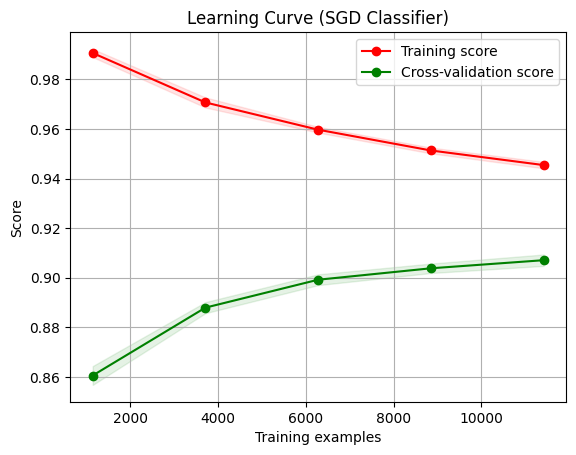

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import SGDClassifier

# Function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # Generate learning curve data
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs,
        train_sizes=np.linspace(0.1, 1.0, 5)
    )

    # Calculate the mean and standard deviation of training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    # Add legend and show plot
    plt.legend(loc="best")
    return plt

# SGD Classifier model (best model based on accuracy)
sgd_classifier = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

# Plot learning curve for SGD Classifier
plot_learning_curve(sgd_classifier, "Learning Curve (SGD Classifier)", X_train_vectorized, y_train, cv=3)
plt.show()

#SVG ROC Curve:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


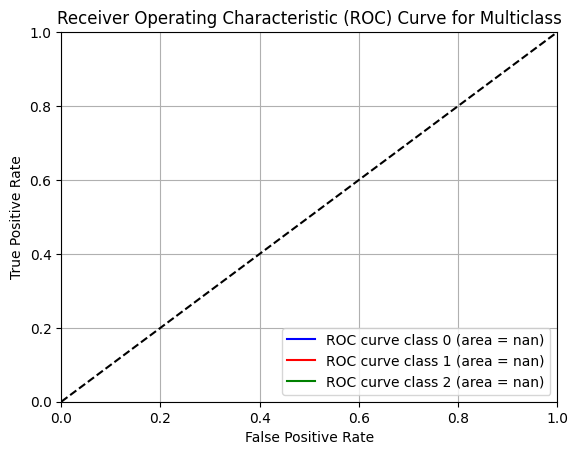

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assume y_train and y_test are multiclass labels
# Binarize the output
y_test_binarized = label_binarize(y_test, classes=[0, 1, -1])  # Update classes based on your labels
n_classes = y_test_binarized.shape[1]

# Fit the SGD Classifier model with log_loss
sgd_classifier = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)
sgd_classifier.fit(X_train_vectorized, y_train)

# Predict probabilities for the test set
y_prob = sgd_classifier.predict_proba(X_test_vectorized)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
colors = ['blue', 'red', 'green']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], label=f'ROC curve class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc='lower right')
plt.grid()
plt.show()

#SGD Classifier (Precision, Recall, and F1-Score):

In [54]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Step 1: Train the SGD Classifier model
sgd_classifier = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)
sgd_classifier.fit(X_train_vectorized, y_train)  # Fit the model with training data

# Step 2: Predict on the validation/test set
y_pred_sgd_val = sgd_classifier.predict(X_test_vectorized)

# Step 3: Precision, Recall, and F1-Score (weighted average)
precision = precision_score(y_test, y_pred_sgd_val, average='weighted')
recall = recall_score(y_test, y_pred_sgd_val, average='weighted')
f1 = f1_score(y_test, y_pred_sgd_val, average='weighted')

# Step 4: Print the results
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")

Precision: 89.35%
Recall: 89.66%
F1-Score: 89.01%


#SVG ROC Curve (Multiclass):

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:84: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:84: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:84: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/

y_score shape: (4283, 3)
y_test_bin shape: (4283, 3)


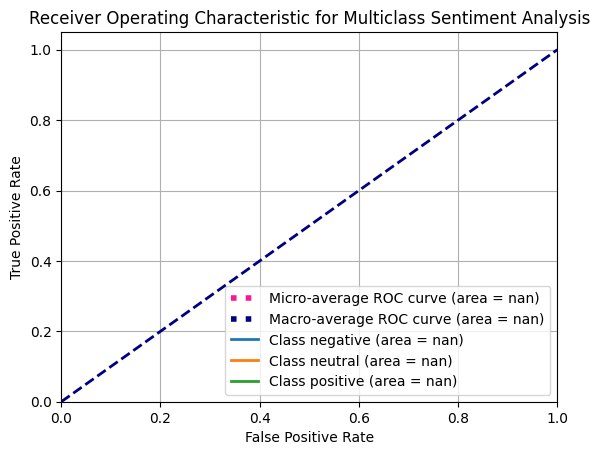

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier

# Assuming y_train and y_test are your labels
classes = ['negative', 'neutral', 'positive']  # Define your classes
y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)

# Train the One-vs-Rest SGD Classifier
sgd_clf = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)
ovr_clf = OneVsRestClassifier(sgd_clf)
ovr_clf.fit(X_train_vectorized, y_train_bin)  # Use vectorized training data

# Compute decision function scores for each class
y_score = ovr_clf.predict_proba(X_test_vectorized)  # Use predict_proba for probabilities

# Check dimensions
print("y_score shape:", y_score.shape)
print("y_test_bin shape:", y_test_bin.shape)

fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC curve and ROC area for each class
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(classes)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {classes[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass Sentiment Analysis')
plt.legend(loc="lower right")
plt.grid()
plt.show()

#SVG Classifier (Precision-Recall Curve):

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class f

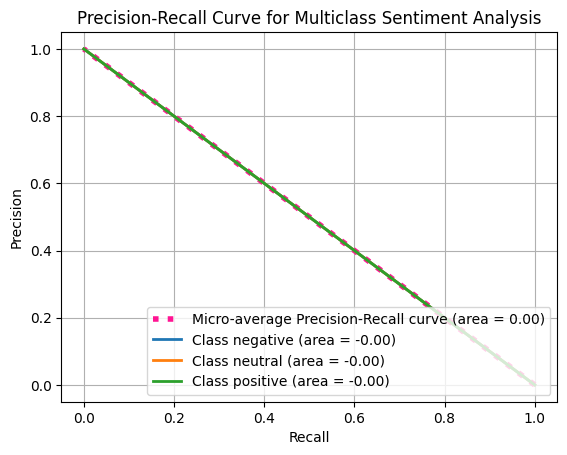

In [56]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Assuming y_train and y_test are your labels and y_score is from the SGDClassifier
# y_test_bin: Binarized y_test for multiclass
# y_score: Predicted probabilities from One-vs-Rest SGD Classifier

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}

for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# Compute micro-average Precision-Recall curve and average precision
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_score, average="micro")

# Plot Precision-Recall curve for each class
plt.figure()
plt.plot(recall["micro"], precision["micro"],
         label='Micro-average Precision-Recall curve (area = {0:0.2f})'.format(average_precision["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

for i in range(len(classes)):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {classes[i]} (area = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass Sentiment Analysis')
plt.legend(loc="lower right")
plt.grid()
plt.show()

#Confusion Matrix with Logistic Regression:

In [57]:
# unique values of y_test and y_train
unique_y_test = np.unique(y_test)
unique_y_train = np.unique(y_train)

print("Unique values in y_test:", unique_y_test)
print("Unique values in y_train:", unique_y_train)

Unique values in y_test: ['Negative' 'Neutral' 'Positive']
Unique values in y_train: ['Negative' 'Neutral' 'Positive']


Unique true labels: [0 1 2]
Unique predicted labels: [0]


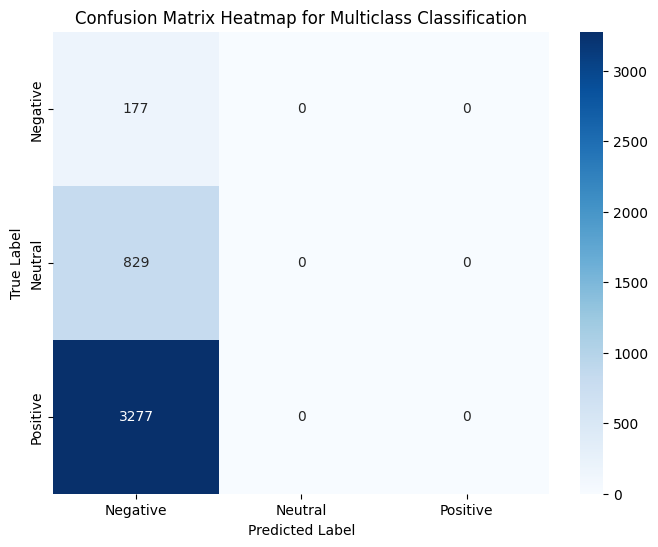

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict on vectorized test data using the One-vs-Rest SGD Classifier
y_score = ovr_clf.predict_proba(X_test_vectorized)  # Get predicted probabilities
y_pred_sgd_val = np.argmax(y_score, axis=1)  # Get class indices from probabilities

# Ensure y_test is in the correct format
y_test_labels = np.array([0 if label == 'Negative' else 1 if label == 'Neutral' else 2 for label in y_test])  # Convert to numerical format

# Check unique values in the true and predicted labels
print("Unique true labels:", np.unique(y_test_labels))
print("Unique predicted labels:", np.unique(y_pred_sgd_val))

# If y_pred_sgd_val contains integers (0, 1, 2), no need to convert to class labels again
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_sgd_val, labels=[0, 1, 2])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap for Multiclass Classification')
plt.show()